In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# importing the df
books = pd.read_csv("../csv/Books.csv")
ratings = pd.read_csv("../csv/Ratings.csv")
users = pd.read_csv("../csv/Users.csv")

/tmp/ipykernel_32374/4069772381.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("../csv/Books.csv")


In [4]:
# Merging the book with rating df
rating_with_name = ratings.merge(books, on="ISBN")

In [5]:
# Filtering users who have rated more than 200 books
voted_users = rating_with_name.groupby("User-ID").count()["Book-Rating"]
experience_voted_user = voted_users[voted_users > 200]
experience_voted_user_index = experience_voted_user.index

In [6]:
# Filtering the ratings from these experienced users
filtered_rating = rating_with_name[
    rating_with_name["User-ID"].isin(experience_voted_user_index)
]

In [7]:
# Filtering books with more than 50 ratings
books_with_rating = filtered_rating.groupby("Book-Title").count()["Book-Rating"]
books_with_higher_rating = books_with_rating[books_with_rating >= 50]
index_books_with_higher_rating = books_with_higher_rating.index

In [8]:
# Final filtered dataframe
final_filtered_rating = filtered_rating[
    filtered_rating["Book-Title"].isin(index_books_with_higher_rating)
]

In [9]:
# Pivot table
pt = final_filtered_rating.pivot_table(
    index="Book-Title", columns="User-ID", values="Book-Rating"
)
pt.fillna(0, inplace=True)

/home/aayush-krk/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


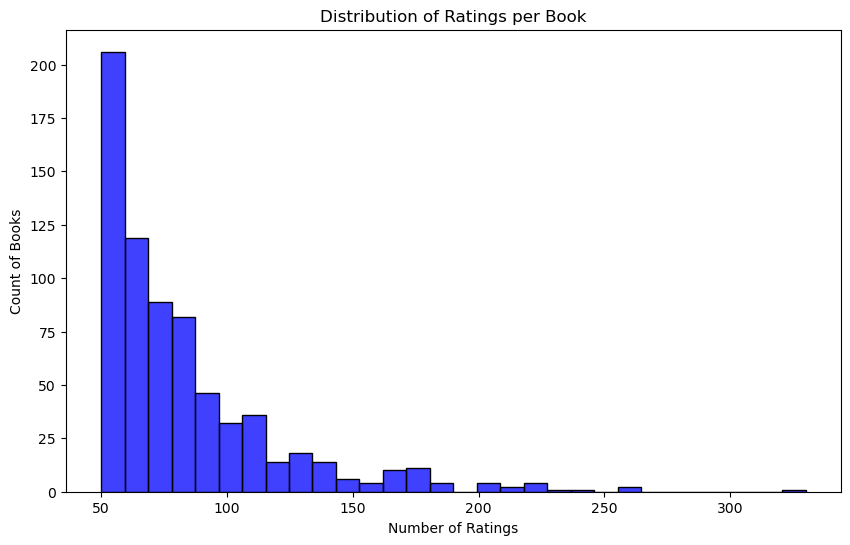

In [10]:
# Visualization code

# Histogram of ratings per book
plt.figure(figsize=(10, 6))
ratings_per_book = final_filtered_rating.groupby("Book-Title")["Book-Rating"].count()
sns.histplot(ratings_per_book, kde=False, bins=30, color="blue")
plt.title("Distribution of Ratings per Book")
plt.xlabel("Number of Ratings")
plt.ylabel("Count of Books")
plt.show()

# Box (Interquartile Range, IQR):
- The box in the middle represents the IQR, which spans from the 25th percentile (Q1) to the 75th percentile (Q3) of the data. This range contains the middle 50% of the data.

### Outliers
- Outliers are individual data points that fall outside the whiskers. They are shown as individual points beyond the whiskers of the box plot.

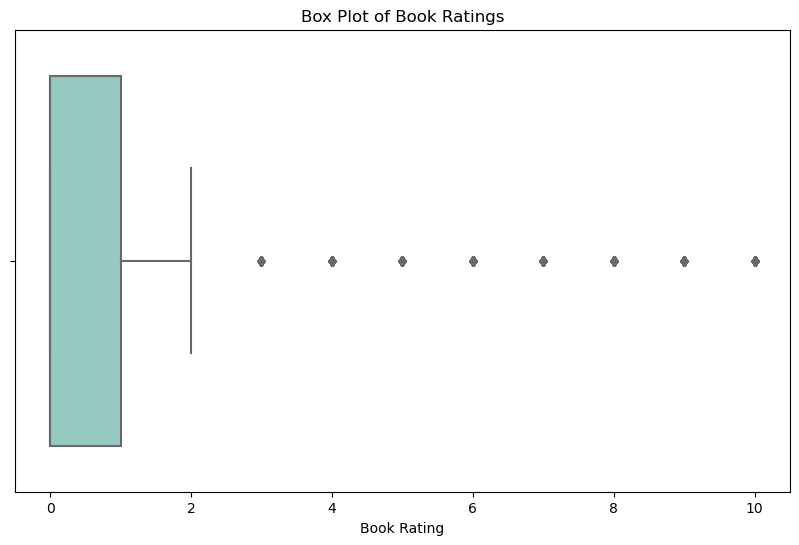

In [11]:
# Box plot of ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x="Book-Rating", data=final_filtered_rating, palette="Set3")
plt.title("Box Plot of Book Ratings")
plt.xlabel("Book Rating")
plt.show()

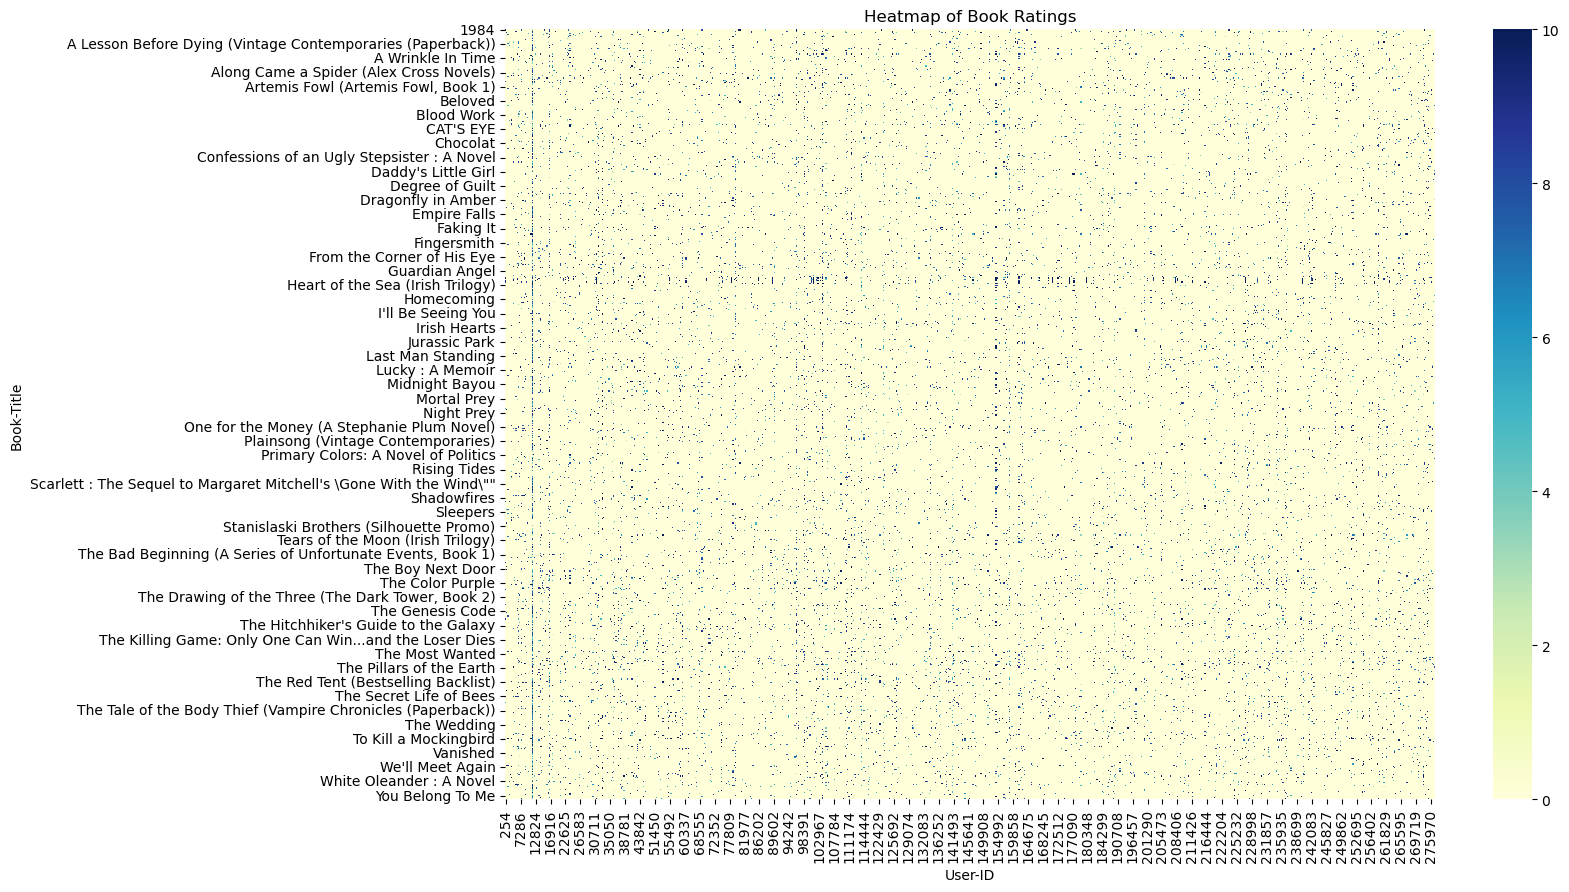

In [13]:
# Heatmap of the pivot table
plt.figure(figsize=(15, 10))
sns.heatmap(pt, cmap="YlGnBu", cbar=True)
plt.title("Heatmap of Book Ratings")
plt.xlabel("User-ID")
plt.ylabel("Book-Title")
plt.show()